In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("../training_data/heart_attack_youngsters_india.csv")

In [3]:
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


In [4]:
columns=df.columns

In [5]:
columns

Index(['Age', 'Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Stress Level',
       'Blood Pressure (systolic/diastolic mmHg)', 'Resting Heart Rate (bpm)',
       'ECG Results', 'Chest Pain Type', 'Maximum Heart Rate Achieved',
       'Exercise Induced Angina', 'Blood Oxygen Levels (SpO2%)',
       'Triglyceride Levels (mg/dL)', 'Heart Attack Likelihood'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [7]:
#Separation of Categorical and Numerical features
cat_cols=[]
num_cols=[]
for i in columns:
    if (df[i].dtype=='object'):
        cat_cols.append(i)
    else:
        num_cols.append(i)
        
print("Categorical features are: ",cat_cols)
print("Numerical features are: ",num_cols)

Categorical features are:  ['Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status', 'Alcohol Consumption', 'Diet Type', 'Physical Activity Level', 'Family History of Heart Disease', 'Diabetes', 'Hypertension', 'Stress Level', 'Blood Pressure (systolic/diastolic mmHg)', 'ECG Results', 'Chest Pain Type', 'Exercise Induced Angina', 'Heart Attack Likelihood']
Numerical features are:  ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)', 'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Resting Heart Rate (bpm)', 'Maximum Heart Rate Achieved', 'Blood Oxygen Levels (SpO2%)', 'Triglyceride Levels (mg/dL)']


In [8]:
#sppliting the Blood pressure column
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure (systolic/diastolic mmHg)'].str.split('/', expand=True)
df=df.drop('Blood Pressure (systolic/diastolic mmHg)',axis=1)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

In [9]:
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,Systolic_BP,Diastolic_BP
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,82,Normal,Non-anginal,183,No,94.1,58,No,177.0,63.1
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,76,Normal,Non-anginal,118,No,97.1,341,No,137.5,110.7
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,86,Normal,Typical,164,No,92.7,373,Yes,138.3,76.6
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,106,Normal,Non-anginal,188,No,98.4,102,Yes,177.1,90.0
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,73,Normal,Atypical,216,No,94.9,235,No,130.7,108.8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              10000 non-null  int64  
 1   Gender                           10000 non-null  object 
 2   Region                           10000 non-null  object 
 3   Urban/Rural                      10000 non-null  object 
 4   SES                              10000 non-null  object 
 5   Smoking Status                   10000 non-null  object 
 6   Alcohol Consumption              10000 non-null  object 
 7   Diet Type                        10000 non-null  object 
 8   Physical Activity Level          10000 non-null  object 
 9   Screen Time (hrs/day)            10000 non-null  int64  
 10  Sleep Duration (hrs/day)         10000 non-null  int64  
 11  Family History of Heart Disease  10000 non-null  object 
 12  Diabetes           

In [11]:
#creating the the new feature pluse pressure 
df['Pluse Pressure']=df['Systolic_BP']-df['Diastolic_BP']
df=df.drop(['Systolic_BP','Diastolic_BP'],axis=1)

In [12]:
num_cols.append('Pluse Pressure')
cat_cols.remove('Blood Pressure (systolic/diastolic mmHg)')

In [13]:
df.columns

Index(['Age', 'Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Screen Time (hrs/day)', 'Sleep Duration (hrs/day)',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Stress Level',
       'Resting Heart Rate (bpm)', 'ECG Results', 'Chest Pain Type',
       'Maximum Heart Rate Achieved', 'Exercise Induced Angina',
       'Blood Oxygen Levels (SpO2%)', 'Triglyceride Levels (mg/dL)',
       'Heart Attack Likelihood', 'Pluse Pressure'],
      dtype='object')

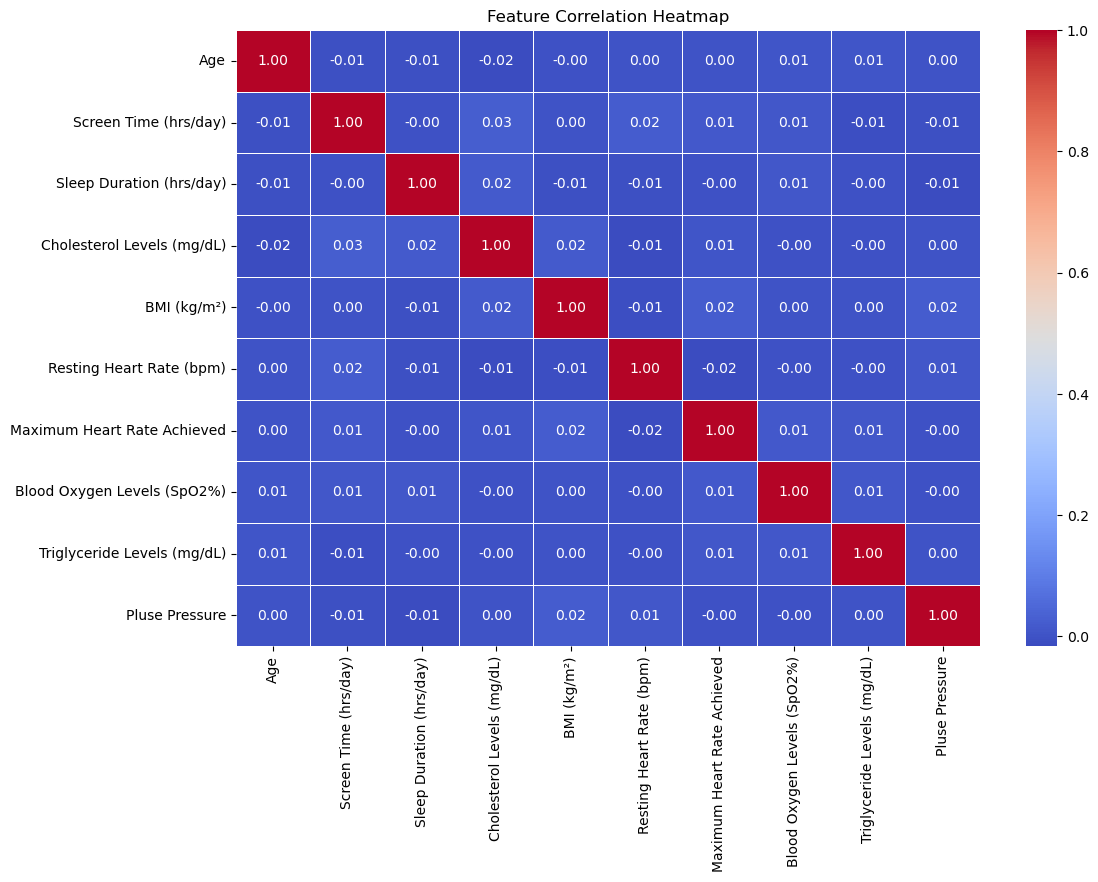

In [15]:
import csv
df.to_csv("./training_data/featured_data.csv",index=False)
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Encoding the categorical columns

In [16]:
#unique values of categorical features
for i in cat_cols:
    uniq=df[i].unique()
    print(f'{i}: {uniq}({len(uniq)})')

Gender: ['Male' 'Female' 'Other'](3)
Region: ['East' 'North' 'West' 'North-East' 'Central' 'South'](6)
Urban/Rural: ['Urban' 'Rural'](2)
SES: ['Middle' 'Low' 'High'](3)
Smoking Status: ['Never' 'Occasionally' 'Regularly'](3)
Alcohol Consumption: ['Regularly' 'Occasionally' 'Never'](3)
Diet Type: ['Non-Vegetarian' 'Vegan' 'Vegetarian'](3)
Physical Activity Level: ['Sedentary' 'High' 'Moderate'](3)
Family History of Heart Disease: ['No' 'Yes'](2)
Diabetes: ['No' 'Yes'](2)
Hypertension: ['Yes' 'No'](2)
Stress Level: ['High' 'Low' 'Medium'](3)
ECG Results: ['Normal' 'Abnormal'](2)
Chest Pain Type: ['Non-anginal' 'Typical' 'Atypical' 'Asymptomatic'](4)
Exercise Induced Angina: ['No' 'Yes'](2)
Heart Attack Likelihood: ['No' 'Yes'](2)


In [17]:
from sklearn.preprocessing import OrdinalEncoder

#  Heart Attack Likelihood
ordinal_encoder=OrdinalEncoder(categories=[['No','Yes']])
df['Heart Attack Likelihood']=ordinal_encoder.fit_transform(df[['Heart Attack Likelihood']])

# Define order for ordinal feature
#SES
ordinal_features=['SES']
ordinal_encoder = OrdinalEncoder(categories=[["Low", "Middle", "High"]])
# Apply encoding
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

#Smoking level & Alcohol Consumption
ordinal_features=['Smoking Status','Alcohol Consumption']
for i in ordinal_features:
    ordinal_encoder=OrdinalEncoder(categories=[['Never','Occasionally','Regularly']])
    df[i]=ordinal_encoder.fit_transform(df[[i]])

#Physical activity level 
ordinal_encoder=OrdinalEncoder(categories=[['Sedentary','High','Moderate']])
df['Physical Activity Level']=ordinal_encoder.fit_transform(df[['Physical Activity Level']])

#Chest Pain 
ordinal_encoder=OrdinalEncoder(categories=[["Asymptomatic", "Non-anginal", "Atypical", "Typical"]])
df['Chest Pain Type']=ordinal_encoder.fit_transform(df[['Chest Pain Type']])

#Stress level
ordinal_encoder=OrdinalEncoder(categories=[['Low','Medium','High']])
df['Stress Level']=ordinal_encoder.fit_transform(df[['Stress Level']])




In [18]:
df

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,Pluse Pressure
0,30,Male,East,Urban,1.0,0.0,2.0,Non-Vegetarian,0.0,3,...,2.0,82,Normal,1.0,183,No,94.1,58,0.0,113.9
1,24,Female,East,Urban,0.0,1.0,1.0,Non-Vegetarian,0.0,15,...,2.0,76,Normal,1.0,118,No,97.1,341,0.0,26.8
2,24,Female,North,Urban,0.0,1.0,1.0,Vegan,1.0,15,...,0.0,86,Normal,3.0,164,No,92.7,373,1.0,61.7
3,27,Male,East,Urban,1.0,1.0,0.0,Vegetarian,0.0,6,...,1.0,106,Normal,1.0,188,No,98.4,102,1.0,87.1
4,21,Female,West,Rural,0.0,1.0,1.0,Vegetarian,2.0,4,...,0.0,73,Normal,2.0,216,No,94.9,235,0.0,21.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,Female,East,Rural,0.0,1.0,1.0,Vegan,0.0,2,...,0.0,88,Abnormal,2.0,147,No,90.8,296,0.0,62.8
9996,35,Female,North-East,Rural,0.0,1.0,0.0,Vegan,1.0,14,...,0.0,116,Normal,2.0,136,No,95.7,254,0.0,85.1
9997,32,Male,West,Urban,1.0,2.0,0.0,Non-Vegetarian,2.0,1,...,2.0,62,Normal,3.0,171,No,98.6,319,0.0,39.5
9998,21,Female,Central,Rural,1.0,2.0,0.0,Vegan,0.0,9,...,1.0,84,Abnormal,1.0,137,No,91.5,317,0.0,9.7


In [19]:
#One hot encoding
df = pd.get_dummies(df, columns=[
    "Gender", "Region", "Urban/Rural", "Diet Type","Exercise Induced Angina",
    "Family History of Heart Disease", "Diabetes", "Hypertension","ECG Results"
], drop_first=True)  # Drop first category to avoid multicollinearity



In [20]:
df

,Age,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Stress Level,...,Region_South,Region_West,Urban/Rural_Urban,Diet Type_Vegan,Diet Type_Vegetarian,Exercise Induced Angina_Yes,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,ECG Results_Normal
0,30,1.0,0.0,2.0,0.0,3,8,148,34.4,2.0,...,0,0,1,0,0,0,0,0,1,1
1,24,0.0,1.0,1.0,0.0,15,9,124,25.0,2.0,...,0,0,1,0,0,0,0,0,0,1
2,24,0.0,1.0,1.0,1.0,15,3,256,33.9,0.0,...,0,0,1,1,0,0,1,1,0,1
3,27,1.0,1.0,0.0,0.0,6,7,137,19.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,21,0.0,1.0,1.0,2.0,4,9,262,28.0,0.0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,0.0,1.0,1.0,0.0,2,4,141,20.1,0.0,...,0,0,0,1,0,0,0,1,0,0
9996,35,0.0,1.0,0.0,1.0,14,7,188,27.4,0.0,...,0,0,0,1,0,0,0,0,0,1
9997,32,1.0,2.0,0.0,2.0,1,5,221,22.9,2.0,...,0,1,1,0,0,0,1,1,0,1
9998,21,1.0,2.0,0.0,0.0,9,4,188,35.1,1.0,...,0,0,0,1,0,0,1,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   SES                                  10000 non-null  float64
 2   Smoking Status                       10000 non-null  float64
 3   Alcohol Consumption                  10000 non-null  float64
 4   Physical Activity Level              10000 non-null  float64
 5   Screen Time (hrs/day)                10000 non-null  int64  
 6   Sleep Duration (hrs/day)             10000 non-null  int64  
 7   Cholesterol Levels (mg/dL)           10000 non-null  int64  
 8   BMI (kg/m²)                          10000 non-null  float64
 9   Stress Level                         10000 non-null  float64
 10  Resting Heart Rate (bpm)             10000 non-null  int64  
 11  Chest Pain Type              

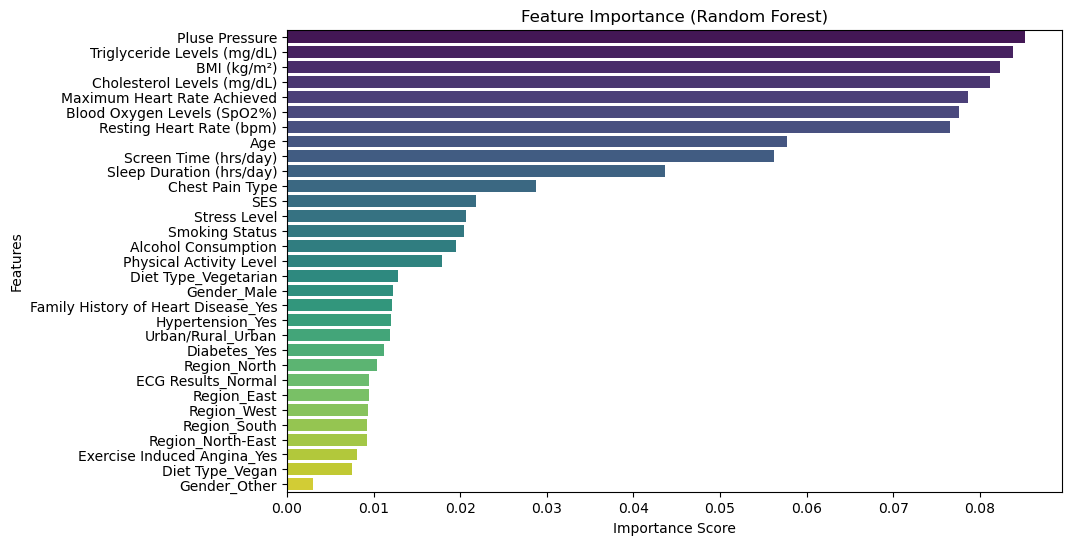

In [22]:
#Feature selection
from sklearn.ensemble import RandomForestClassifier

# Splitting dataset (excluding target variable)
X = df.drop(columns=["Heart Attack Likelihood"])  # Adjust if needed
y = df["Heart Attack Likelihood"]

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [23]:
import csv

feature_importance.to_csv('Feature_importance.csv',index=False)


In [24]:
# Dummping the encoded data 
df.to_csv('Encoded_data.csv',index=False)
df

,Age,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Stress Level,...,Region_South,Region_West,Urban/Rural_Urban,Diet Type_Vegan,Diet Type_Vegetarian,Exercise Induced Angina_Yes,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,ECG Results_Normal
0,30,1.0,0.0,2.0,0.0,3,8,148,34.4,2.0,...,0,0,1,0,0,0,0,0,1,1
1,24,0.0,1.0,1.0,0.0,15,9,124,25.0,2.0,...,0,0,1,0,0,0,0,0,0,1
2,24,0.0,1.0,1.0,1.0,15,3,256,33.9,0.0,...,0,0,1,1,0,0,1,1,0,1
3,27,1.0,1.0,0.0,0.0,6,7,137,19.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,21,0.0,1.0,1.0,2.0,4,9,262,28.0,0.0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,0.0,1.0,1.0,0.0,2,4,141,20.1,0.0,...,0,0,0,1,0,0,0,1,0,0
9996,35,0.0,1.0,0.0,1.0,14,7,188,27.4,0.0,...,0,0,0,1,0,0,0,0,0,1
9997,32,1.0,2.0,0.0,2.0,1,5,221,22.9,2.0,...,0,1,1,0,0,0,1,1,0,1
9998,21,1.0,2.0,0.0,0.0,9,4,188,35.1,1.0,...,0,0,0,1,0,0,1,0,0,0


In [25]:
cat_cols.remove("Heart Attack Likelihood")

In [26]:
num_cols

['Age',
 'Screen Time (hrs/day)',
 'Sleep Duration (hrs/day)',
 'Cholesterol Levels (mg/dL)',
 'BMI (kg/m²)',
 'Resting Heart Rate (bpm)',
 'Maximum Heart Rate Achieved',
 'Blood Oxygen Levels (SpO2%)',
 'Triglyceride Levels (mg/dL)',
 'Pluse Pressure']

In [27]:
cat_cols=np.array(cat_cols)
num_cols=np.array(num_cols)

In [28]:
np.save('Categorical_features',cat_cols)
np.save('Numerical_features',num_cols)

In [29]:
cat_cols

array(['Gender', 'Region', 'Urban/Rural', 'SES', 'Smoking Status',
       'Alcohol Consumption', 'Diet Type', 'Physical Activity Level',
       'Family History of Heart Disease', 'Diabetes', 'Hypertension',
       'Stress Level', 'ECG Results', 'Chest Pain Type',
       'Exercise Induced Angina'], dtype='<U31')